<a href="https://colab.research.google.com/github/alvaro-salgado/PCD_MCD/blob/main/Tarea_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 5

Obtener los datos de [Kaggle](https://www.kaggle.com/datasets/devbatrax/fracture-detection-using-x-ray-images)

In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()

# Mueve el archivo a la ubicación correcta
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Descarga el dataset
!kaggle datasets download -d devbatrax/fracture-detection-using-x-ray-images

# Descomprime el dataset
!unzip -q fracture-detection-using-x-ray-images.zip -d data

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/devbatrax/fracture-detection-using-x-ray-images
License(s): apache-2.0
 94% 161M/172M [00:01<00:00, 157MB/s]
100% 172M/172M [00:01<00:00, 125MB/s]


In [28]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Directorios del dataset
data_dir = '/content/data/data/train/'
val_dir = '/content/data/data/val/'

# Parámetros
img_size = 224
batch_size = 32

# Aumentación de datos para mejorar generalización
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

datagen_val = ImageDataGenerator(rescale=1./255)

train_data = datagen_train.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary'
)

val_data = datagen_val.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 8863 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [7]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(img_size, img_size, 3))
base_model.trainable = False

# Construcción de la red neuronal
global_avg_pool = GlobalAveragePooling2D()(base_model.output)
dense_layer = Dense(256, activation='relu')(global_avg_pool)
dropout_layer = Dropout(0.5)(dense_layer)
out_layer = Dense(1, activation='sigmoid')(dropout_layer)

model = Model(inputs=base_model.input, outputs=out_layer)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks para mejorar el entrenamiento
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)




58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
# Entrenamiento
history = model.fit(train_data, validation_data=val_data, epochs=15, callbacks=[checkpoint, early_stop])

Epoch 1/15
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.5427 - loss: 0.6991

277/277 ━━━━━━━━━━━━━━━━━━━━ 148s 484ms/step - accuracy: 0.5428 - loss: 0.6990 - val_accuracy: 0.5100 - val_loss: 0.8137
Epoch 2/15
277/277 ━━━━━━━━━━━━━━━━━━━━ 114s 412ms/step - accuracy: 0.6441 - loss: 0.6268 - val_accuracy: 0.4267 - val_loss: 0.7543
Epoch 3/15
277/277 ━━━━━━━━━━━━━━━━━━━━ 114s 409ms/step - accuracy: 0.6926 - loss: 0.5867 - val_accuracy: 0.4400 - val_loss: 0.8114
Epoch 4/15
277/277 ━━━━━━━━━━━━━━━━━━━━ 114s 412ms/step - accuracy: 0.7091 - loss: 0.5555 - val_accuracy: 0.4617 - val_loss: 0.8355
Epoch 5/15
277/277 ━━━━━━━━━━━━━━━━━━━━ 114s 411ms/step - accuracy: 0.7396 - loss: 0.5238 - val_accuracy: 0.4800 - val_loss: 0.8875
Epoch 6/15
277/277 ━━━━━━━━━━━━━━━━━━━━ 116s 418ms/step - accuracy: 0.7442 - loss: 0.5137 - val_accuracy: 0.4667 - val_loss: 0.9241
Epoch 7/15
277/277 ━━━━━━━━━━━━━━━━━━━━ 114s 412ms/step - accuracy: 0.7473 - loss: 0.5067 - val_accuracy: 0.4767 - val_loss: 0.8661


Epoch 1/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 640ms/step - accuracy: 0.7512 - loss: 0.4859

277/277 ━━━━━━━━━━━━━━━━━━━━ 221s 656ms/step - accuracy: 0.7515 - loss: 0.4855 - val_accuracy: 0.6800 - val_loss: 0.8658
Epoch 2/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - accuracy: 0.9428 - loss: 0.1485

277/277 ━━━━━━━━━━━━━━━━━━━━ 148s 533ms/step - accuracy: 0.9429 - loss: 0.1484 - val_accuracy: 0.6967 - val_loss: 1.0436
Epoch 3/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 146s 527ms/step - accuracy: 0.9719 - loss: 0.0882 - val_accuracy: 0.6317 - val_loss: 1.3726
Epoch 4/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 202s 528ms/step - accuracy: 0.9902 - loss: 0.0377 - val_accuracy: 0.6817 - val_loss: 1.2303
Epoch 5/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.9920 - loss: 0.0252

277/277 ━━━━━━━━━━━━━━━━━━━━ 148s 533ms/step - accuracy: 0.9920 - loss: 0.0252 - val_accuracy: 0.7400 - val_loss: 1.1723
Epoch 6/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 148s 534ms/step - accuracy: 0.9926 - loss: 0.0245 - val_accuracy: 0.6567 - val_loss: 1.9387


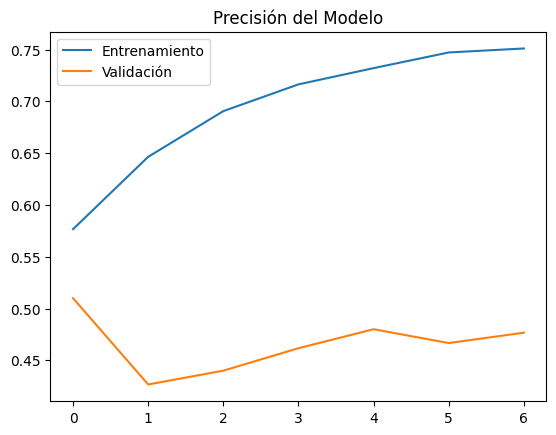

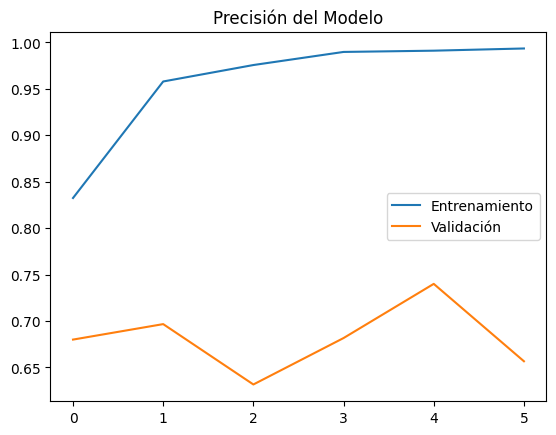

In [9]:

# Descongelar capas superiores y aplicar Fine-Tuning
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

history_fine = model.fit(train_data, validation_data=val_data, epochs=10, callbacks=[checkpoint, early_stop])

# Evaluación y visualización
def plot_metrics(history):
    plt.plot(history.history['accuracy'], label='Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Validación')
    plt.legend()
    plt.title('Precisión del Modelo')
    plt.show()

plot_metrics(history)
plot_metrics(history_fine)

# Guardar el modelo final
model.save('fracture_classifier_finetuned.h5')

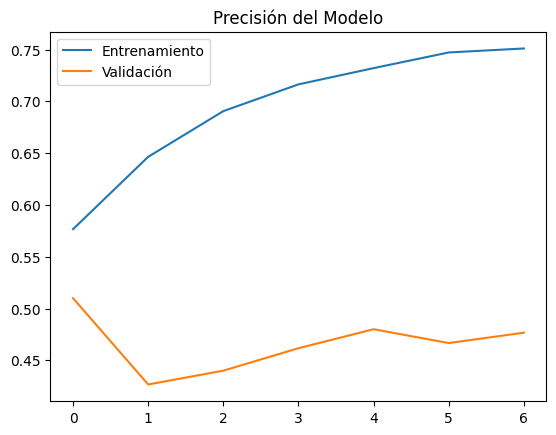

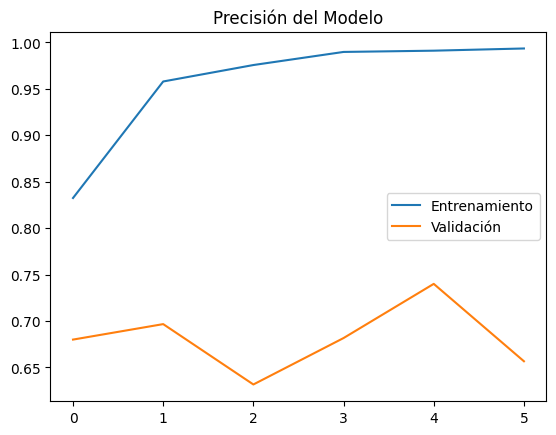

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step


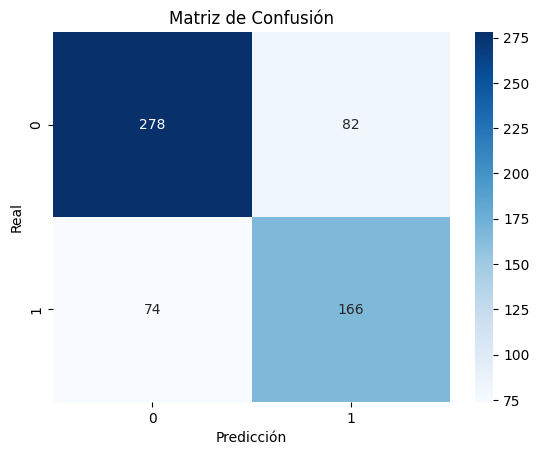

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       360
           1       0.67      0.69      0.68       240

    accuracy                           0.74       600
   macro avg       0.73      0.73      0.73       600
weighted avg       0.74      0.74      0.74       600



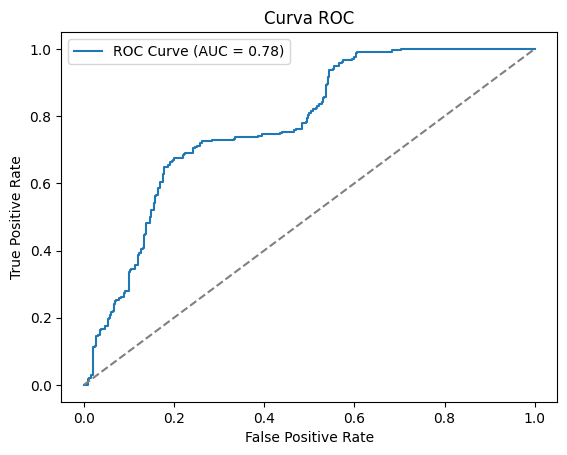

In [31]:
# Cargar el mejor modelo después del fine-tuning
model.load_weights('best_model.h5')

# Evaluación y visualización
def plot_metrics(history):
    plt.plot(history.history['accuracy'], label='Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Validación')
    plt.legend()
    plt.title('Precisión del Modelo')
    plt.show()

plot_metrics(history)
plot_metrics(history_fine)

# Evaluación del modelo final
y_true = val_data.classes
y_pred_probs = model.predict(val_data)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Reporte de clasificación
print(classification_report(y_true, y_pred))

# Curva ROC y AUC
fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()